# Classification of EEG Signal when Subject in Cognitive Load and Relaxed

In [5]:
import sys
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from scipy import signal
from scipy.fftpack import fft
from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D0
# import ipyvolume as ipv
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from scipy.stats import expon

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import decomposition

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import random

import warnings
warnings.simplefilter('ignore')
import pywt

In [6]:
# Necessary
from functions import entropy, beta
# from functions import autoregress
# For Visualization
from functions import make_meshgrid,plot_contours



## Filter Visualization

[ 0.99479124 -1.89220538  0.99479124] [ 1.         -1.89220538  0.98958248]


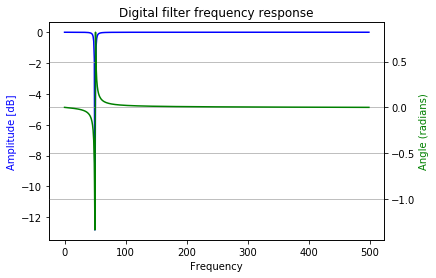

Wavelet db4
  Family name:    Daubechies
  Short name:     db
  Filters length: 8
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [9]:
sampling_frequency = 1000 # Hz
channelAccuracies = {}

f0 = 50/500 # Frequency to be removed from signal (Hz) It has to be divided by Nyquist Frequency!
Q = 30.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q)
print(b,a)
w, h = signal.freqz(b,a)
w = (w*500)/math.pi
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()
fig.savefig('filter.eps')
w = pywt.Wavelet('db4')
print(w)

In [4]:
max(abs(20 * np.log10(abs(h))))

12.818497237869009

### Set needs to be segregated to train and test data without any processing

In [5]:
np.random.seed(0)

y_1 = pd.read_csv("./Data/Sree/target.csv", header=None)
y_1 = np.array(y_1)
# print(y_1.shape)
# y_1 = np.concatenate((y_1,y_1,y_1,y_1,y_1,y_1,y_1,y_1,y_1,y_1,y_1,y_1),axis=1)
y_1 = np.reshape(y_1,((y_1.size),1))
print(y_1.shape)
print("Number of Class 1: {}".format((y_1==1).sum()))
print("Number of Class 2: {}".format((y_1==2).sum()))

y_2 = pd.read_csv("./Data/Saksham/target.csv", header=None)
y_2 = np.array(y_2)
# print(y_2.shape)
# y_2 = np.concatenate((y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2),axis=1)
y_2 = np.reshape(y_2,((y_2.size),1))
print(y_2.shape)
print("Number of Class 1: {}".format((y_2==1).sum()))
print("Number of Class 2: {}".format((y_2==2).sum()))

# y_3 = pd.read_csv("./Data/Aditya/target.csv", header=None)
# y_3 = np.array(y_3)
# # print(y_3.shape)
# # y_3 = np.concatenate((y_3,y_3,y_3,y_3,y_3,y_3,y_3,y_3,y_3,y_3,y_3,y_3),axis=1)
# y_3 = np.reshape(y_3,((y_3.size),1))
# print(y_3.shape)
# print("Number of Class 1: {}".format((y_3==1).sum()))
# print("Number of Class 2: {}".format((y_3==2).sum()))

y_4 = pd.read_csv("./Data/Himanshu/target.csv", header=None)
y_4 = np.array(y_4)
# print(y_4.shape)
# y_4 = np.concatenate((y_4,y_4,y_4,y_4,y_4,y_4,y_4,y_4,y_4,y_4,y_4,y_4),axis=1)
y_4 = np.reshape(y_4,((y_4.size),1))
print(y_4.shape)
print("Number of Class 1: {}".format((y_4==1).sum()))
print("Number of Class 2: {}".format((y_4==2).sum()))

y_5 = pd.read_csv("./Data/Satyam/target.csv", header=None)
y_5 = np.array(y_5)
# print(y_5.shape)
# y_5 = np.concatenate((y_5,y_5,y_5,y_5,y_5,y_5,y_5,y_5,y_5,y_5,y_5,y_5),axis=1)
y_5 = np.reshape(y_5,((y_5.size),1))
print(y_5.shape)
print("Number of Class 1: {}".format((y_5==1).sum()))
print("Number of Class 2: {}".format((y_5==2).sum()))

# y_6 = pd.read_csv("./Data/Vikas/target.csv", header=None)
# y_6 = np.array(y_6)
# # print(y_6.shape)
# # y_6 = np.concatenate((y_6,y_6,y_6,y_6,y_6,y_6,y_6,y_6,y_6,y_6,y_6,y_6),axis=1)
# y_6 = np.reshape(y_6,((y_6.size),1))
# print(y_6.shape)
# print("Number of Class 1: {}".format((y_6==1).sum()))
# print("Number of Class 2: {}".format((y_6==2).sum()))

y = np.concatenate((y_1,y_2,y_4,y_5))
print(y.shape)
print("Number of Class 1: {}".format((y==1).sum()))
print("Number of Class 2: {}".format((y==2).sum()))


# Just Saksham Data
# y_2 = pd.read_csv("./Data/Saksham/target.csv", header=None)
# y_2 = np.array(y_2)
# print(y_2.shape)
# y_2 = np.concatenate((y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2,y_2),axis=1)
# y_2 = np.reshape(y_2,((y_2.size),1))
# print(y_2.shape)
# print("Number of Class 1: {}".format((y_2==1).sum()))
# print("Number of Class 2: {}".format((y_2==2).sum()))
# y = y_2

# y = pd.read_csv("./Data/Saksham/target.csv", header=None)
# y = np.array(y)
# print(y.shape)
# print("Number of Class 1: {}".format((y==1).sum()))
# print("Number of Class 2: {}".format((y==2).sum()))

(101, 1)
Number of Class 1: 51
Number of Class 2: 50
(103, 1)
Number of Class 1: 51
Number of Class 2: 52
(93, 1)
Number of Class 1: 46
Number of Class 2: 47
(99, 1)
Number of Class 1: 49
Number of Class 2: 50
(396, 1)
Number of Class 1: 197
Number of Class 2: 199


#### Breaking into Test and Train. From this point onwards, Test data will not be touched till the end.

In [6]:
len(list(range(63)))

63

In [7]:
channels = [17,49]
allData_1 = np.zeros((101,2,833*12)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
for index,channelNumber in enumerate(channels):
    x = pd.read_csv("./Data/Sree/channel_{}.csv".format(channelNumber+1), header=None)
    x = np.array(x)
    x = np.transpose(x)
    allData_1[:,index,:] =x
#     for i in range(0,101):
# #         allData_1[i,index,:] =x
#         for k in range(0,12):
#             allData_1[12*i+k,index,:] = x[i,833*k:833*(k+1)]

allData_2 = np.zeros((103,2,833*12)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
for index,channelNumber in enumerate(channels):
    x = pd.read_csv("./Data/Saksham/channel_{}.csv".format(channelNumber+1), header=None)
    x = np.array(x)
    x = np.transpose(x)
    allData_2[:,index,:] =x
#     for i in range(0,103):
# #         allData_2[i,index,:] =x
#         for k in range(0,12):
#             allData_2[12*i+k,index,:] = x[i,833*k:833*(k+1)]
            
# allData_3 = np.zeros((103,2,12*833)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
# for index,channelNumber in enumerate(channels):
#     x = pd.read_csv("./Data/Aditya/channel_{}.csv".format(channelNumber+1), header=None)
#     x = np.array(x)
#     x = np.transpose(x)
#     allData_3[:,index,:] =x
# #     for i in range(0,102):
# #         allData_3[i,index,:] =x
# #         for k in range(0,12):
# #             allData_3[12*i+k,index,:] = x[i,833*k:833*(k+1)]

allData_4 = np.zeros((93,2,833*12)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
for index,channelNumber in enumerate(channels):
    x = pd.read_csv("./Data/Himanshu/channel_{}.csv".format(channelNumber+1), header=None)
    x = np.array(x)
    x = np.transpose(x)
    allData_4[:,index,:] =x
#     for i in range(0,93):
# #         allData_4[i,index,:] =x
#         for k in range(0,12):
#             allData_4[12*i+k,index,:] = x[i,833*k:833*(k+1)]
            
allData_5 = np.zeros((99,2,833*12)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
for index,channelNumber in enumerate(channels):
    x = pd.read_csv("./Data/Satyam/channel_{}.csv".format(channelNumber+1), header=None)
    x = np.array(x)
    x = np.transpose(x)
    allData_5[:,index,:] =x
#     for i in range(0,99):
# #         allData_5[i,index,:] =x
#         for k in range(0,12):
#             allData_5[12*i+k,index,:] = x[i,833*k:833*(k+1)]  

# allData_6 = np.zeros((101,2,12*833)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
# for index,channelNumber in enumerate(channels):
#     x = pd.read_csv("./Data/Vikas/channel_{}.csv".format(channelNumber+1), header=None)
#     x = np.array(x)
#     x = np.transpose(x)
#     allData_6[:,index,:] =x
# #     for i in range(0,101):
# #         for k in range(0,12):
# #             allData_6[12*i+k,index,:] = x[i,833*k:833*(k+1)]
            
print(allData_1.shape)
print(allData_2.shape)
# print(allData_3.shape)
print(allData_4.shape)           
print(allData_5.shape)
# print(allData_6.shape)
allData = np.concatenate((allData_1,allData_2,allData_4,allData_5))
print(allData.shape)

# Just Saksham Data

# allData = np.zeros((32,63,833*12)) # 101*12 data intervals, 63 channels, 9.996/12 seconds
# for channelNumber in range(1, 64):
#     x = pd.read_csv("./Data/Saksham/channel_{}.csv".format(channelNumber), header=None)
#     x = np.array(x)
#     x = np.transpose(x)
#     allData[:,channelNumber-1,:] = x
# print(allData.shape)

(101, 2, 9996)
(103, 2, 9996)
(93, 2, 9996)
(99, 2, 9996)
(396, 2, 9996)


In [70]:
# ONLY ONE SUBJECT AT A TIME
x_train, x_test, y_train, y_test = train_test_split(allData_5, y_5, test_size = 0.3, random_state = 0) #Random state == seed


In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(69, 2, 9996)
(69, 1)
(30, 2, 9996)
(30, 1)


#### Saving into Files

In [72]:
# import csv
# for channelNumber in range(1,64):
#     filename = './Data/Train/x_train_channel_'+str(channelNumber)+'.csv'
#     with open(filename, 'w') as csvFile:
#         writer = csv.writer(csvFile)
#         writer.writerows(x_train[:,channelNumber-1,:])
#     csvFile.close()
    

# filename = './Data/Train/y_train.csv'
# with open(filename, 'w') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(y_train)
# csvFile.close()


# for channelNumber in range(1,64):
#     filename = './Data/Test/x_test_channel_'+str(channelNumber)+'.csv'
#     with open(filename, 'w') as csvFile:
#         writer = csv.writer(csvFile)
#         writer.writerows(x_test[:,channelNumber-1,:])
#     csvFile.close()

# filename = './Data/Test/y_test.csv'
# with open(filename, 'w') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(y_test)
# csvFile.close()

In [73]:
# # x_train[0,0,:]
# print(x_train.shape)
# print(x_test.shape)

### Preprocessing the train data

##### Wavelet Decomposition and Reconstruction of Beta

In [74]:
x_train = signal.filtfilt(b,a,x_train,axis=2)
print(x_train.shape)
x_t = np.zeros((x_train.shape))
for index,channelNumber in enumerate(channels):
    x_t[:,index,:] = beta(x_train[:,index,:],w)
print(x_t.shape)

(69, 2, 9996)
(69, 2, 9996)


In [75]:
# x_train[0,0,:]

In [76]:
# x_t[0,0,:]

In [77]:
scalers = []
scaledx_train = np.zeros(np.shape(x_t))
for index,channelNumber in enumerate(channels):
    scaler= preprocessing.StandardScaler().fit(x_t[:, index, :]) #Norm -> mean=0, var=1
    scalers.append(scaler)
    scaledx_train[:, index, :] = scalers[index].transform(x_t[:, index, :])
 


In [78]:
# scaledx_train[0,0,1:10]

#### Feature selected == Entropy

In [79]:
bins = np.zeros((2,256))
max_lim = np.zeros(2)
min_lim = np.zeros(2)
for i,channelNumber in enumerate(channels):
    max_lim = scaledx_train[:,i,:].max()
#     print(max_lim)
    min_lim = scaledx_train[:,i,:].min()
#     print(min_lim)
    bins[i,:] = np.linspace(min_lim,max_lim, 256)

scaledx_train2 = np.zeros([scaledx_train.shape[0],2])
for i in range(scaledx_train.shape[0]):
    for j,channelNumber in enumerate(channels):
        inds = np.digitize(scaledx_train[i,j,:], bins[j,:])
#         print((inds==0).any())
        ent = entropy(inds)
        scaledx_train2[i,j] = ent

### Validating that data interval is representative

In [ ]:
# Check with more subjects
# Try to get higher accu.
# Try other feat

In [ ]:
# import os
# path = os.listdir('./Data/')

In [ ]:
# name = 1
# channelNumber=1

# pathname = "./Data/"+str(path[name])+"/channel_"+str(channelNumber)+".csv"
# x = pd.read_csv(pathname, header=None)
# x = np.array(x)
# x = np.transpose(x)
# x.shape 
# # ttttt = np.array(x[:,:32])
# # ttttt.shape
# # pathname

In [ ]:
# .shape

In [ ]:
# allDataBig = np.zeros((32*6,63,9996))
# allData = np.zeros((32*12*6,63,833))
# for index,name in enumerate(path):
#     for channelNumber in range(1, 64):
#         pathname = "./Data/"+str(path[index])+"/channel_"+str(channelNumber)+".csv"
#         x = pd.read_csv(pathname, header=None)
#         x = np.array(x)
#         x = np.transpose(x)
#         allDataBig[32*index:32*(index+1),channelNumber-1,:] = np.array(x[:32,:])
#         for i in range(0,32):
#             for k in range(0,12):
#                 allData[12*i+k,channelNumber-1,:] = np.array(x[i,833*k:833*(k+1)])

In [ ]:
# import numpy.matlib
# yBig = []
# for _,name in enumerate(path):    
#     pathname = "./Data/"+str(name)+"/target.csv"
#     yBig_part = pd.read_csv(pathname, header=None)
#     yBig_part = np.array(yBig_part)
#     yBig.append(yBig_part[:32])

# yBig = np.reshape(yBig,(6*32,1))
    

In [ ]:
# print(yBig.shape)
# print(allDataBig.shape)

In [ ]:
# # p=0.7
# # N = allDataBig.shape[0]
# # tf = np.zeros((N,1),dtype=bool)
# # tf[:round(p*N)] = True;
# # Np = np.random.permutation(N)
# # tf = tf[Np]
# # tf = np.reshape(tf,tf.shape[0])
# # x_trainBig = allDataBig[tf,:,:];
# # y_trainBig = yBig[tf];
# # x_testBig = allDataBig[~tf,:,:];
# # y_testBig = yBig[~tf];

# x_trainBig = allDataBig
# y_trainBig =yBig

# x_trainSmall = np.zeros((x_trainBig.shape[0]*12,x_trainBig.shape[1],int(x_trainBig.shape[2]/12)))
# y_trainSmall = np.zeros(y_trainBig.shape[0]*12)
# # x_testSmall = np.zeros((x_testBig.shape[0]*12,x_testBig.shape[1],int(x_testBig.shape[2]/12)))
# # y_testSmall = np.zeros(y_testBig.shape[0]*12)


# for i in range(x_trainBig.shape[0]):
#     for k in range(0,12):
#         x_trainSmall[12*i+k,:,:] = x_trainBig[i,:,833*k:833*(k+1)]
#         y_trainSmall[i:i+12] = np.resize(np.matlib.repmat(y_trainBig[0],12,1),12)
    

In [ ]:
# print(x_trainBig.shape)
# print(y_trainBig.shape)
# print(x_trainSmall.shape)
# print(y_trainSmall.shape)

In [ ]:
# print(x_trainBig.shape)
# x_trainBig = signal.filtfilt(b,a,x_trainBig,axis=2)
# print(x_trainBig.shape)
# x_tBig = np.zeros((x_trainBig.shape))
# print(x_tBig.shape)
# print(x_trainBig[:,channelNumber-1,:].shape)
# for channelNumber in range(1, 63):
#     x_tBig[:,channelNumber-1,:] = beta(x_trainBig[:,channelNumber-1,:],w)
# print(x_tBig.shape)

# print(x_trainSmall.shape)
# x_trainSmall = signal.filtfilt(b,a,x_trainSmall,axis=2)
# print(x_trainSmall.shape)
# x_tSmall = np.zeros((x_trainSmall.shape))
# print(x_tSmall.shape)
# print(x_trainSmall[:,channelNumber-1,:].shape)
# for channelNumber in range(1, 64):
#     x_tSmall[:,channelNumber-1,:] = beta(x_trainSmall[:,channelNumber-1,:],w)
# print(x_tSmall.shape)

# scalersBig = []
# scaledx_trainBig = np.zeros(np.shape(x_tBig))
# for channelNumber in range(1, 64):
#     scaler= preprocessing.StandardScaler().fit(x_tBig[:, channelNumber-1, :]) #Norm -> mean=0, var=1
#     scalersBig.append(scaler)
#     scaledx_trainBig[:, channelNumber-1, :] = scalersBig[channelNumber-1].transform(x_tBig[:, channelNumber-1, :])
 
# scalersSmall = []
# scaledx_trainSmall = np.zeros(np.shape(x_tSmall))
# for channelNumber in range(1, 64):
#     scaler= preprocessing.StandardScaler().fit(x_tSmall[:, channelNumber-1, :]) #Norm -> mean=0, var=1
#     scalersSmall.append(scaler)
#     scaledx_trainSmall[:, channelNumber-1, :] = scalersSmall[channelNumber-1].transform(x_tSmall[:, channelNumber-1, :])
 
# binsBig = np.zeros((63,256))
# max_limBig = np.zeros(63)
# min_limBig = np.zeros(63)
# for i in range(40):
#     max_limBig = scaledx_trainBig[:,i,:].max()
#     min_limBig = scaledx_trainBig[:,i,:].min()
#     binsBig[i,:] = np.linspace(min_limBig,max_limBig, 256)

# scaledx_train2Big = np.zeros([scaledx_trainBig.shape[0],63])
# for i in range(scaledx_trainBig.shape[0]):
#     for j in range(63):
#         inds = np.digitize(scaledx_trainBig[i,j,:], binsBig[j,:])
#         ent = entropy(inds)
#         scaledx_train2Big[i,j] = ent

# binsSmall = np.zeros((63,256))
# max_limSmall = np.zeros(63)
# min_limSmall = np.zeros(63)
# for i in range(63):
#     max_limSmall = scaledx_trainSmall[:,i,:].max()
#     min_limSmall = scaledx_trainSmall[:,i,:].min()
#     binsSmall[i,:] = np.linspace(min_limSmall,max_limSmall, 256)

# scaledx_train2Small = np.zeros([scaledx_trainSmall.shape[0],63])
# for i in range(scaledx_trainSmall.shape[0]):
#     for j in range(63):
#         inds = np.digitize(scaledx_trainSmall[i,j,:], binsSmall[j,:])
#         ent = entropy(inds)
#         scaledx_train2Small[i,j] = ent

In [ ]:
# # ChannelList = list([14,15,16,17,18,19,45,46,47,48,49,50,51,52])
# ChannelList = list([17,49])

# for _,channel in enumerate(ChannelList):
#     print(channel)

In [ ]:
# scaledx_train2Big.shape
# # for _,name in enumerate(path):
# #     print(name)

In [ ]:
# for _,channel in enumerate(ChannelList):
#     for index,name in enumerate(path):
#         print('\n******* Subject {} Channel {}*******\n'.format(name,channel))
#         fig, (ax0,ax1) = plt.subplots(nrows=2)
#         # For 1 Channel, 126 samples. Lets see the diff
#         s_tBig = scaledx_train2Big[index*32:32*(index+1),:]
#         print(s_tBig.shape)
#         s_tSmall = scaledx_train2Small[index*32*12:12*32*(index+1),:]
#         print(s_tSmall.shape)

#         lower_error = np.zeros(int(s_tBig.shape[0]))   
#         upper_error = np.zeros(int(s_tBig.shape[0]))
#         for i in range(int(s_tBig.shape[0])):
#             s1 = s_tSmall[12*i,channel] - s_tBig[i,channel]
#             s2 = s_tSmall[12*i+1,channel] - s_tBig[i,channel]
#             s3 = s_tSmall[12*i+2,channel] - s_tBig[i,channel]
#             s4 = s_tSmall[12*i+3,channel] - s_tBig[i,channel]
#             s5 = s_tSmall[12*i+4,channel] - s_tBig[i,channel]
#             s6 = s_tSmall[12*i+5,channel] - s_tBig[i,channel]
#             s7 = s_tSmall[12*i+6,channel] - s_tBig[i,channel]
#             s8 = s_tSmall[12*i+7,channel] - s_tBig[i,channel]
#             s9 = s_tSmall[12*i+8,channel] - s_tBig[i,channel]
#             s10 = s_tSmall[12*i+9,channel] - s_tBig[i,channel]
#             s11 = s_tSmall[12*i+10,channel] - s_tBig[i,channel]
#             s12 = s_tSmall[12*i+11,channel] - s_tBig[i,channel]
#             lower_error[i] = np.array([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12]).min()
#             upper_error[i] = np.array([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12]).max()
#         #     print('Mean {}, Low {} Upp {} S {}'.format(scaledx_train2Big[i,0],lower_error[i],
#         #                                                upper_error[i],[s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12]))
#         print(lower_error.shape)
#         print(upper_error.shape)
#         asymmetric_error = [lower_error, upper_error]
        
#         ax0.errorbar(list(range(int(s_tBig.shape[0]))), s_tBig[:,channel], 
#                      yerr=asymmetric_error, fmt='o')
#         # ax0.set_yscale('log')

#         xt = np.array(list(range(int(s_tBig.shape[0]))))
#         xt = np.reshape(xt,(32,1))
#         xt = np.concatenate((xt,xt,xt,xt,xt,xt,xt,xt,xt,xt,xt,xt),axis=1)
#         xt = np.reshape(xt,((xt.size),1))
#         yt = []
#         yt_m = []
#         for i in range(int(s_tBig.shape[0])):
#             for k in range(12):
#                 yt.append(s_tSmall[12*i+k,channel])
#             yt_m.append(np.mean(s_tSmall[12*i:12*(i+1),channel]))

#     #     print(np.array(yt).shape, np.array(xt).shape)

#         ax1.scatter(xt, yt,s=20, edgecolors='k')
#         ax1.scatter(list(range(int(s_tBig.shape[0]))), yt_m,s=20, c='r')
#         # ax1.scatter(list(range(int(scaledx_train2Big.shape[0]/3))), scaledx_train2Big[:23,0],s=20, c='y')
#         plt.show()
#         print('Mean')
#         for i in range(int(s_tBig.shape[0])):
#             print(yt_m[i])
#         print('Big')
#         for i in range(int(s_tBig.shape[0])):
#             print(s_tBig[i,channel])
#         for i in range(int(s_tBig.shape[0])):
#             print('Mean {}    Big {}   Diff {}'.format(yt_m[i], s_tBig[i,channel], s_tBig[i,channel]-yt_m[i]))

In [ ]:
# 33+++++++++++++++++++++++++++++++++
# ++++print(list(range(43,64)))

#### Recursive Channel Insertion (n=1)

In [ ]:
# scaledx_train2.shape
# Verify for more number of subjects
# Same features. Tune classifier for more accuracy
# Increase features if 2 fails

In [ ]:
# i = 44
# selectedChannels_train = scaledx_train2[:,i]
# selectedChannels_train = np.reshape(selectedChannels_train, [scaledx_train2.shape[0],-1])
# param_distributions={'kernel': ['rbf','linear'], 'C':expon(scale=10),'gamma':expon(scale=10),'degree':[1,2,3,4,5]}
# clf = RandomizedSearchCV(SVC(), param_distributions=param_distributions, n_iter=1000,random_state=5,scoring='f1')
# clf.fit(selectedChannels_train, y_train);

In [ ]:
# acc = []
# for i in range(63):
#     selectedChannels_train = scaledx_train2[:,i]
#     selectedChannels_train = np.reshape(selectedChannels_train, [scaledx_train2.shape[0],-1])
#     param_distributions={'kernel': ['rbf','linear'], 'C':expon(scale=10),'gamma':expon(scale=10),'degree':[1,2,3,4,5]}
#     clf = RandomizedSearchCV(SVC(), param_distributions=param_distributions, n_iter=1000,random_state=5,scoring='f1')
#     clf.fit(selectedChannels_train, y_train);
# #     print(clf.best_score_)
# #     print(clf.best_estimator_)
# #     print(clf.best_params_)

#     svmclassifier = svm.SVC(kernel = clf.best_params_['kernel'], C = clf.best_params_['C'], gamma = clf.best_params_['gamma'],degree=clf.best_params_['degree'])
#     scores = cross_val_score(svmclassifier, selectedChannels_train, y_train, cv=10)
#     acc.append(scores.mean())
#     print('Accuracy of {} is {}'.format(i,acc[i]))

In [ ]:
# accuracy =[]
# channelNo = []
# with open ('accuracy.txt', 'rt') as myfile:
#     for myline in myfile:
#         txt = myline.split()
#         channelNo.append(txt[2])
#         accuracy.append(txt[4])
# #         print(myline[0:19]) 
# # print(accuracy)
# # print(channelNo)
# print('************SORTED*************')
# # print(sorted(accuracy))
# Z = [x for _,x in sorted(zip(accuracy,channelNo))]
# print(Z[-5:])

# print(sorted(accuracy)[-5:])


In [ ]:
# BestChannel = np.where(acc == np.max(acc))
# print(BestChannel[0])
# print('Accuracy of Channel {} is {}'.format(BestChannel[0][0],acc[BestChannel[0][0]]))
# channel = BestChannel[0][0]
# print(channel)
# plt.figure()
# plt.bar(range(63),acc)

In [38]:
channels

[17, 49]

In [80]:
scaledx_train2.shape
y_train.shape

(69, 1)

In [86]:
channel=1#(index corresponding to 17)

In [87]:
# channel = [17,15]

selectedChannels_train = scaledx_train2[:,channel]
selectedChannels_train = np.reshape(selectedChannels_train, [scaledx_train2.shape[0],-1])
param_distributions={'kernel': ['rbf','linear'], 'C':expon(scale=10),'gamma':expon(scale=10),'degree':[1,2,3,4,5]}
clf = RandomizedSearchCV(SVC(), param_distributions=param_distributions, n_iter=1000,random_state=5,scoring='f1')
clf.fit(selectedChannels_train, y_train);
svmclassifier = svm.SVC(kernel = clf.best_params_['kernel'], C = clf.best_params_['C'], gamma = clf.best_params_['gamma'],degree=clf.best_params_['degree'])
scores = cross_val_score(svmclassifier, selectedChannels_train, y_train, cv=10)
print("Training Accuracy {}".format(scores.mean()))
svmclassifier.fit(selectedChannels_train, y_train)

Training Accuracy 0.9565476190476192


SVC(C=3.5211464588819035, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.841876606297904,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Preprocess the Test Data

In [88]:
svmclassifier

SVC(C=3.5211464588819035, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.841876606297904,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [89]:
x_test.shape

(30, 2, 9996)

In [91]:
%%time
# x_testChannel2 = np.zeros((x_test.shape[0]))
# print(channel)
x_testChannel = signal.filtfilt(b,a,x_test[0:1,channel,:])
# print(x_testChannel.shape)
x_testChannel2 = np.zeros(x_testChannel.shape)
# print(x_testChannel2.shape)
x_testChannel2 = beta(x_testChannel ,w)
# print(x_testChannel2.shape)
scaledx_test= np.zeros(x_testChannel.shape)
scaledx_test= scalers[channel].transform(x_testChannel2)
# print('st{}'.format(scaledx_test.shape))
scaledx_test2 = np.zeros((1,1))
# print(scaledx_test2.shape)
for i in range(scaledx_test.shape[0]):
    inds = np.digitize(scaledx_test[i,:], bins[channel,:])
    ent = entropy(inds)
    scaledx_test2[i] = ent
# print('st2{}'.format(scaledx_test2.shape))       
scaledx_test2 = np.reshape(scaledx_test2, [1,1])

test_predictions = svmclassifier.predict(scaledx_test2)
# print(test_predictions)
# print(y_test[0])
accuracy = np.mean(test_predictions == y_test[0]) #np.reshape(y_test,scaledx_test2.shape[0])
print("Test Accuracy {}".format(accuracy))

Test Accuracy 1.0
Wall time: 4.99 ms


In [ ]:
%%time
# x_testChannel2 = np.zeros((x_test.shape[0]))
print(channel)
x_testChannel = signal.filtfilt(b,a,x_test[:,channel,:])
print(x_testChannel.shape)
x_testChannel2 = np.zeros(x_testChannel.shape)
print(x_testChannel2.shape)
for i,_ in enumerate(channel):
    x_testChannel2[:,i,:] = beta(x_testChannel[:,i,:] ,w)
print(x_testChannel2.shape)
scaledx_test= np.zeros(x_testChannel.shape)
for k,i in enumerate(channel):
    scaledx_test[:,k,:] = scalers[i].transform(x_testChannel2[:,k,:])

scaledx_test2 = np.zeros((x_testChannel.shape[0],x_testChannel.shape[1]))
print(scaledx_test2.shape)
for i in range(scaledx_test.shape[0]):
    for k,j in enumerate(channel):
        inds = np.digitize(scaledx_test[i,k,:], bins[j,:])
        ent = entropy(inds)
        scaledx_test2[i,k] = ent
        
scaledx_test2 = np.reshape(scaledx_test2, [x_test.shape[0],2])
test_predictions = svmclassifier.predict(scaledx_test2)
accuracy = np.mean(test_predictions == np.reshape(y_test,scaledx_test2.shape[0]))
print("Test Accuracy {}".format(accuracy))


##### With Best Channel No. 2

In [ ]:
channel = BestChannel[0][1]
print(channel)
selectedChannels_train = scaledx_train2[:,BestChannel[0][1]]
selectedChannels_train = np.reshape(selectedChannels_train, [scaledx_train2.shape[0],-1])
param_distributions={'kernel': ['rbf','linear'], 'C':expon(scale=10),'gamma':expon(scale=10),'degree':[1,2,3,4,5]}
clf = RandomizedSearchCV(SVC(), param_distributions=param_distributions, n_iter=1000,random_state=5,scoring='f1')
clf.fit(selectedChannels_train, y_train);
svmclassifier = svm.SVC(kernel = clf.best_params_['kernel'], C = clf.best_params_['C'], gamma = clf.best_params_['gamma'],degree=clf.best_params_['degree'])
scores = cross_val_score(svmclassifier, selectedChannels_train, y_train, cv=10)
print("Training Accuracy {}".format(scores.mean()))
svmclassifier.fit(selectedChannels_train, y_train)

In [ ]:
%%time
x_testChannel2 = np.zeros((x_test.shape[0]))
x_testChannel = signal.filtfilt(b,a,x_test[:,channel,:])
x_testChannel2 = beta(x_test[:,channel],w)
scaledx_test = scalers[channel].transform(x_testChannel2)
scaledx_test2 = np.zeros((x_test.shape[0]))
for i in range(scaledx_test.shape[0]):
    inds = np.digitize(scaledx_test[i,:], bins[channel,:])
    ent = entropy(inds)
    scaledx_test2[i] = ent
scaledx_test2 = np.reshape(scaledx_test2, [x_test.shape[0],1])
test_predictions = svmclassifier.predict(scaledx_test2)
accuracy = np.mean(test_predictions == np.reshape(y_test,scaledx_test2.shape[0]))
print("Test Accuracy {}".format(accuracy))


In [ ]:
x_train.shape